This is a notebook to see the effect of image size on the dilation of vessel segmetnation for pigmentation extraction as final step of the pipeline

In [2]:
import sys
sys.path.insert(0, '../src/')

import extract_pigmentation as ep
import config
import pandas as pd
from PIL import Image
import numpy as np

In [3]:
def resize_mask(mask, shape):
    mask_im = Image.fromarray(mask)
    return mask_im.resize(shape)

In [4]:
crop_csv = pd.read_csv(config.results_dir+ "M1/Good_quality/image_list.csv")
vp = config.results_dir + "M2/binary_vessel/raw_binary/"
dp = config.results_dir + "M2/optic_disc_cup/raw/"
out_csv = config.results_dir  + 'retinal_background_lab_values.csv'

f_list = []
L = []
a = []
b = []

#native resolution 2464, 1632

for _,row in crop_csv.iterrows():


    if _ == 1: 
        im_pth = row.Name
        f = im_pth.split('/')[-1]

        im = Image.open(im_pth)
        cropped_im = ep.crop_img(row.centre_w, row.centre_h, row.radius, im)
        base = np.array(cropped_im.size)
        shape_arr = [ base, base*2, base*0.5,
                     np.array((base[0]*2, base[1])),   np.array((base[0], base[1]*2)), 
                     np.array((base[0]*0.5, base[1])), np.array((base[0], base[1]*0.5))]

        mask_l = []
        im_l = []
        for shape in shape_arr:

            # reshape to int
            shape = shape.astype(int)

            resize_im = cropped_im.resize(shape)
            masks = ep.get_masks(vp+f, dp+f)
            masks = [np.array(resize_mask(x, shape)) for x in masks]
    
            inv_mask = ep.get_inverted_masks(masks, np.array(resize_im))
            mask_l.append(inv_mask)
            im_l.append(resize_im)
    
        # plot the images
        plot_with_mask(im_l, mask_l)
        break

NameError: name 'plot_with_mask' is not defined

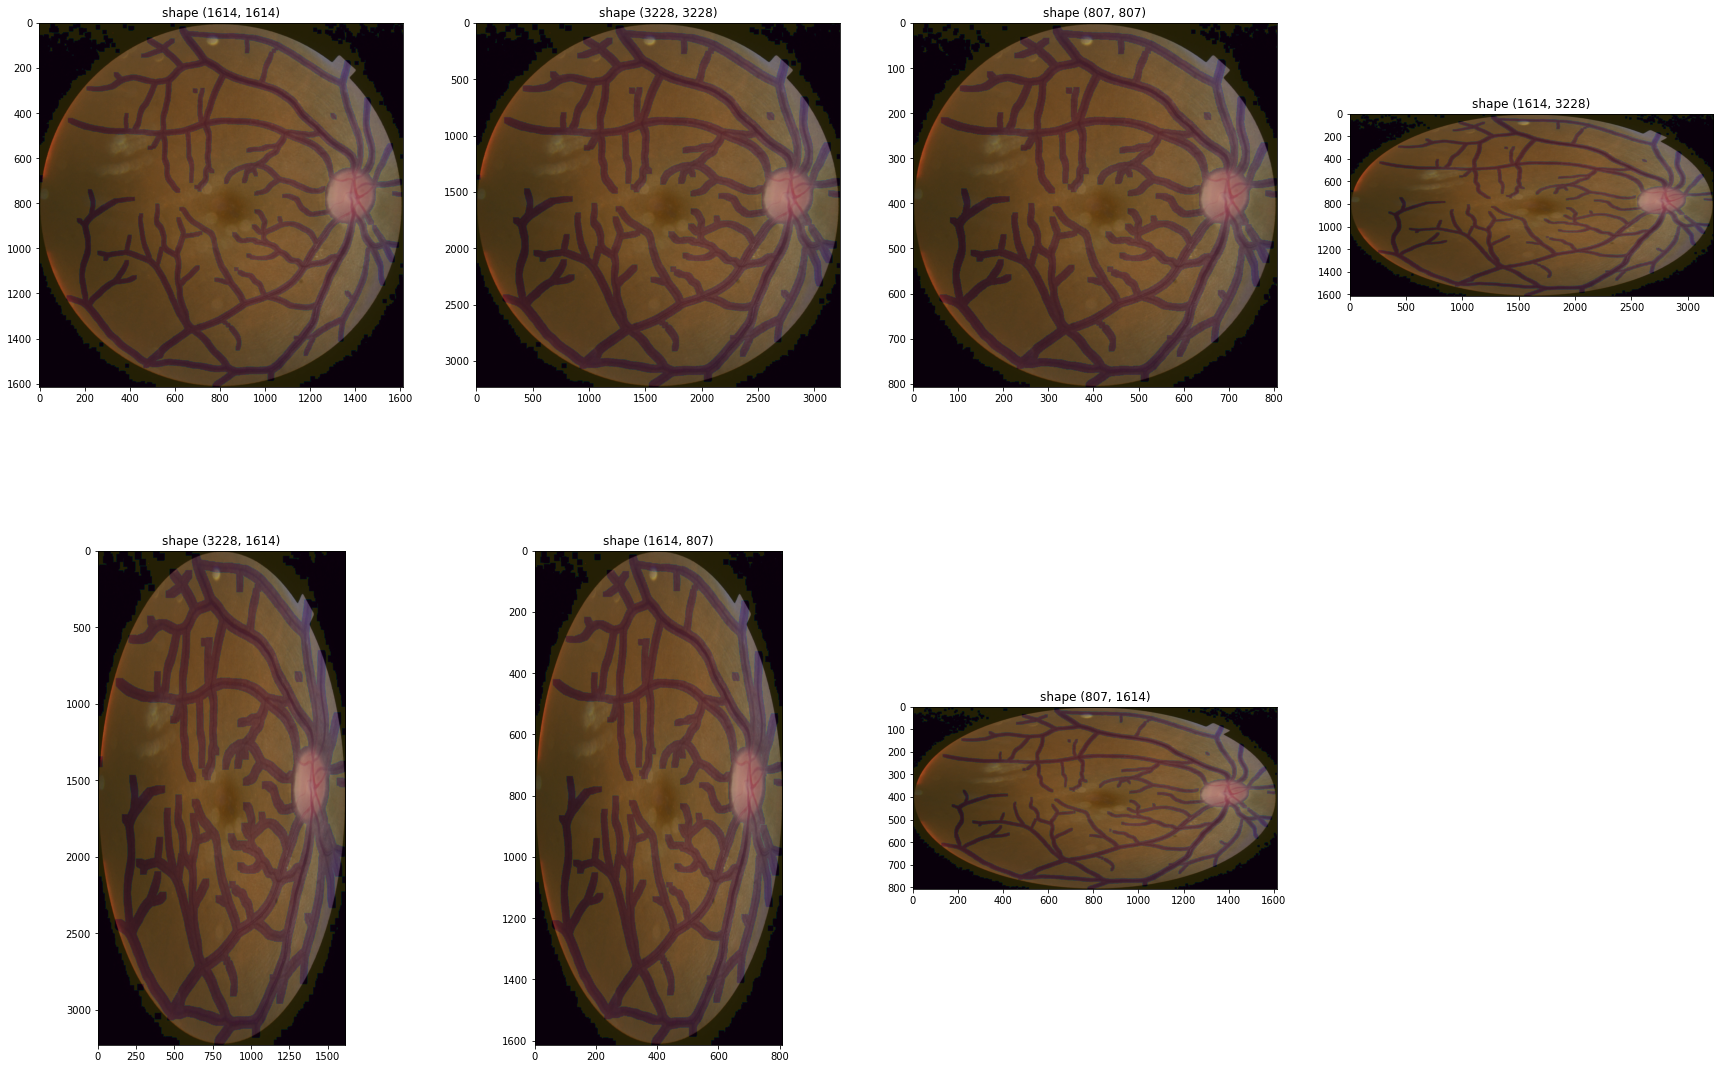

In [5]:
import matplotlib.pyplot as plt

def plot_with_mask(im_l, mask_l):

    fig, axs = plt.subplots(2,4,figsize=(30,20))
    for ax, im, mask in zip(axs.ravel(), im_l, mask_l):
        ax.imshow(np.array(im))
        ax.imshow(mask, alpha=0.14)
        ax.set_title("shape {}".format(mask.shape))

    plt.axis('off')
    plt.show()

plot_with_mask(im_l, mask_l)